# Rental property analysis in Germany


# Task 2 – Exploring Relationships

1. Importing Visualization Libraries and Data

2. Missing Value Check

2.1 Duplicates

2.2 Mixed-Type data

2.3 Change data type

2.4 Removing Outliers

3. Exploring Relationships

3.1. Correlations

3.2 Create correlation heatmap using Seaborn

4. Scatterplots

4.1. Pair plots

5. Categorical Plots

5.1 Creating a categorical variable

6. Defining Hypothesis


# 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#check matplotlib version
matplotlib.__version__

'3.7.0'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Define path

path = r"C:\Users\marce\Documents\Apartment rental offers in Germany"

In [5]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'immodata_cleaned.csv'))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210771 entries, 0 to 210770
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        210771 non-null  int64  
 1   State             210771 non-null  object 
 2   Maintenance_fee   207189 non-null  float64
 3   Heating_type      182377 non-null  object 
 4   TV_offer          184455 non-null  object 
 5   Newly_built       210771 non-null  bool   
 6   Balcony           210771 non-null  bool   
 7   Picture_count     210771 non-null  int64  
 8   Price_trend       209264 non-null  float64
 9   Total_rent        178163 non-null  float64
 10  Year_constructed  210771 non-null  int64  
 11  Kitchen           210771 non-null  bool   
 12  Cellar            210771 non-null  bool   
 13  Base_rent         210771 non-null  float64
 14  Area(m2)          210771 non-null  float64
 15  City              210771 non-null  object 
 16  House_condition   16

In [7]:
df.head()

,Unnamed: 0,State,Maintenance_fee,Heating_type,TV_offer,Newly_built,Balcony,Picture_count,Price_trend,Total_rent,...,Base_rent,Area(m2),City,House_condition,Lift,Flat_type,Pincode,Rooms_number,Floor,Garden
0,0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,840.0,...,595.0,86.00,Dortmund,well_kept,False,ground_floor,44269,4,1.0,True
1,1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,NaN,...,800.0,89.00,Rhein_Pfalz_Kreis,refurbished,False,ground_floor,67459,3,NaN,False
2,2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,1300.0,...,965.0,83.80,Dresden,first_time_use,True,apartment,1097,3,3.0,False
3,3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,NaN,...,343.0,58.15,Mittelsachsen_Kreis,NaN,False,other,9599,3,3.0,False
4,4,Bremen,138.00,self_contained_central_heating,NaN,False,True,19,2.46,903.0,...,765.0,84.97,Bremen,refurbished,False,apartment,28213,3,1.0,False


# 2.Missing Value Check

In [8]:
# Check for missing values

df.isnull().sum()

Unnamed: 0              0
State                   0
Maintenance_fee      3582
Heating_type        28394
TV_offer            26316
Newly_built             0
Balcony                 0
Picture_count           0
Price_trend          1507
Total_rent          32608
Year_constructed        0
Kitchen                 0
Cellar                  0
Base_rent               0
Area(m2)                0
City                    0
House_condition     49137
Lift                    0
Flat_type           27869
Pincode                 0
Rooms_number            0
Floor               36064
Garden                  0
dtype: int64

In [9]:
#Dropping 'Unnamed' column
df.drop('Unnamed: 0', axis=1, inplace= True)

In [10]:
#Impute missing values with mean

df['Price_trend']=df['Price_trend'].fillna(df['Price_trend'].mean())
df['Maintenance_fee']=df['Maintenance_fee'].fillna(df['Maintenance_fee'].mean())
df['Total_rent']=df['Total_rent'].fillna(df['Total_rent'].mean())
df['Floor']=df['Floor'].fillna(df['Floor'].mean())

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210771 entries, 0 to 210770
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             210771 non-null  object 
 1   Maintenance_fee   210771 non-null  float64
 2   Heating_type      182377 non-null  object 
 3   TV_offer          184455 non-null  object 
 4   Newly_built       210771 non-null  bool   
 5   Balcony           210771 non-null  bool   
 6   Picture_count     210771 non-null  int64  
 7   Price_trend       210771 non-null  float64
 8   Total_rent        210771 non-null  float64
 9   Year_constructed  210771 non-null  int64  
 10  Kitchen           210771 non-null  bool   
 11  Cellar            210771 non-null  bool   
 12  Base_rent         210771 non-null  float64
 13  Area(m2)          210771 non-null  float64
 14  City              210771 non-null  object 
 15  House_condition   161634 non-null  object 
 16  Lift              21

In [12]:
#Finding the most frequent value
df['TV_offer'].mode()


0    ONE_YEAR_FREE
Name: TV_offer, dtype: object

In [13]:
#Finding the most frequent value
df['Heating_type'].mode()

0    central_heating
Name: Heating_type, dtype: object

In [14]:
#Finding the most frequent value
df['House_condition'].mode()

0    well_kept
Name: House_condition, dtype: object

In [15]:
#Finding the most frequent value
df['Flat_type'].mode()

0    apartment
Name: Flat_type, dtype: object

In [16]:
#Impute categorical missing values with mode()
df['TV_offer'].fillna('ONE_YEAR_FREE',inplace=True)
df['Heating_type'].fillna('central_heating',inplace=True)
df['House_condition'].fillna('well_kept',inplace=True)
df['Flat_type'].fillna('apartment',inplace=True)

In [17]:
df.isnull().sum()

State               0
Maintenance_fee     0
Heating_type        0
TV_offer            0
Newly_built         0
Balcony             0
Picture_count       0
Price_trend         0
Total_rent          0
Year_constructed    0
Kitchen             0
Cellar              0
Base_rent           0
Area(m2)            0
City                0
House_condition     0
Lift                0
Flat_type           0
Pincode             0
Rooms_number        0
Floor               0
Garden              0
dtype: int64

##  2.1 Duplicates

In [18]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(209258, 22)

### 2.2 Mixed-Type data

In [20]:
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)
        
        # data frame doesn't contain mixed-type data

In [21]:
df.describe()

,Maintenance_fee,Picture_count,Price_trend,Total_rent,Year_constructed,Base_rent,Area(m2),Pincode,Rooms_number,Floor
count,209258.000000,209258.000000,209258.000000,2.092580e+05,209258.000000,209258.000000,209258.000000,209258.000000,209258.000000,209258.000000
mean,152.776259,9.840752,3.409336,9.205990e+02,1967.951381,656.979275,74.287750,37203.802521,2.606964,2.149667
std,342.187402,6.402902,1.961090,3.445363e+04,38.449838,586.176109,155.105335,27621.160682,2.508964,2.781092
min,0.000000,0.000000,-12.330000,0.000000e+00,1803.000000,0.000000,0.000000,1057.000000,1.000000,-1.000000
25%,96.000000,6.000000,2.020000,4.980000e+02,1950.000000,336.742500,54.860000,9131.000000,2.000000,1.000000
50%,140.000000,9.000000,3.390000,7.510000e+02,1973.000000,491.190000,67.500000,38667.000000,3.000000,2.000000
75%,190.000000,13.000000,4.560000,9.200000e+02,1996.000000,806.730000,86.940000,56170.000000,3.000000,3.000000
max,146118.000000,121.000000,14.920000,1.575154e+07,2022.000000,120000.000000,66100.000000,99994.000000,999.000000,650.000000


## 2.3 Change data type

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209258 entries, 0 to 210770
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             209258 non-null  object 
 1   Maintenance_fee   209258 non-null  float64
 2   Heating_type      209258 non-null  object 
 3   TV_offer          209258 non-null  object 
 4   Newly_built       209258 non-null  bool   
 5   Balcony           209258 non-null  bool   
 6   Picture_count     209258 non-null  int64  
 7   Price_trend       209258 non-null  float64
 8   Total_rent        209258 non-null  float64
 9   Year_constructed  209258 non-null  int64  
 10  Kitchen           209258 non-null  bool   
 11  Cellar            209258 non-null  bool   
 12  Base_rent         209258 non-null  float64
 13  Area(m2)          209258 non-null  float64
 14  City              209258 non-null  object 
 15  House_condition   209258 non-null  object 
 16  Lift              20

In [23]:
df['Maintenance_fee']=df['Maintenance_fee'].astype(int)
df['Area(m2)']=df['Area(m2)'].astype(int)
df['Base_rent']=df['Base_rent'].astype(int)
df['Floor']=df['Floor'].astype(int)
df['Price_trend']=df['Price_trend'].astype(int)
df['Total_rent']=df['Total_rent'].astype(int)

## 2.4 Removing Outliers

In [24]:
df['Rooms_number'].value_counts().sort_index()

1      22833
2      76065
3      80947
4      23460
5       4545
6        980
7        258
8         95
9         25
10        15
11         8
12         5
13         2
15         4
21         1
23         3
25         1
30         1
32         1
45         1
75         1
79         1
99         1
100        1
140        1
160        1
230        1
999        1
Name: Rooms_number, dtype: int64

In [25]:
df['Floor'].value_counts().sort_index()

-1        273
 0      20086
 1      50163
 2      80539
 3      30092
 4      16064
 5       6908
 6       2222
 7        908
 8        523
 9        385
 10       338
 11       218
 12       129
 13       118
 14        91
 15        57
 16        32
 17        27
 18         9
 19        15
 20         9
 21        12
 22         2
 23         2
 24         3
 25         1
 26         2
 29         1
 31         1
 32         1
 37         1
 41         1
 45         1
 80         6
 83         1
 98         2
 99         1
 105        1
 124        1
 133        1
 134        1
 135        1
 136        3
 137        2
 138        1
 139        1
 645        1
 650        1
Name: Floor, dtype: int64

In [26]:
df['Base_rent'].value_counts().sort_index()

0         57
1          2
5          1
6          1
8          2
          ..
17781      1
20000      1
20100      1
30990      1
120000     1
Name: Base_rent, Length: 2770, dtype: int64

In [27]:
#Removing 0 values for Base_rent, Area(m2), and Maintenance_fee
df = df[df['Area(m2)'] != 0]
df = df[df['Maintenance_fee'] != 0]
df = df[df['Base_rent'] != 0]


In [28]:
#Removing outlier 66100 and values >500 for Area (m2)
df = df[(df['Area(m2)'] != 66100) & (df['Area(m2)'] < 500)]

In [29]:
# Removing oturlier for Maintenance_fee and values >5000
df = df[(df['Maintenance_fee'] != 146118) & (df['Maintenance_fee']<1000)]

In [30]:
# Removing oturlier for Rooms_number
df = df[df['Rooms_number'] <=5]

In [31]:
# Removing oturlier for Floor (as the highest building in Germany has 58 floors )
df = df[df['Floor'] <=20]

In [33]:
#Removing  values >3500 for Base_rent
df = df[df['Base_rent']<=3500]

In [34]:
#Removing  values >20000 for Total_rent
df = df[(df['Total_rent']<=5000)]


In [35]:
df.describe()


,Maintenance_fee,Picture_count,Price_trend,Total_rent,Year_constructed,Base_rent,Area(m2),Pincode,Rooms_number,Floor
count,204611.000000,204611.000000,204611.000000,204611.000000,204611.000000,204611.000000,204611.000000,204611.000000,204611.000000,204611.000000
mean,150.827096,9.711477,2.916388,818.613237,1967.988207,629.525245,72.566543,36743.680066,2.574529,2.101710
std,77.644924,6.280740,1.919510,454.002940,38.363419,433.724243,29.029994,27412.864626,0.901460,1.537416
min,1.000000,0.000000,-12.000000,0.000000,1803.000000,1.000000,1.000000,1057.000000,1.000000,-1.000000
25%,99.000000,6.000000,2.000000,495.000000,1950.000000,334.000000,54.000000,9130.000000,2.000000,1.000000
50%,140.000000,9.000000,3.000000,741.000000,1973.000000,484.000000,67.000000,38229.000000,3.000000,2.000000
75%,190.000000,13.000000,4.000000,919.000000,1996.000000,790.000000,86.000000,55122.000000,3.000000,3.000000
max,970.000000,121.000000,14.000000,4460.000000,2022.000000,3500.000000,430.000000,99994.000000,5.000000,20.000000


In [36]:

df.to_csv(os.path.join(path,'02 Data','Prepared Data','immodata_cleaned_upd.csv'))

# 3. Exploring Relationships

### 3.1. Correlations

In [37]:
#Create a new data frame with necessary variables for exploratory visual analysis
df_1 = df[['State','Base_rent','Total_rent','Maintenance_fee', 'Year_constructed','Area(m2)', 'City', 'Lift', 'Flat_type', 'Rooms_number', 'Floor', 'Garden' ]]

In [38]:
# Create a correlation matrix using pandas

df_1.corr(numeric_only = True)

,Base_rent,Total_rent,Maintenance_fee,Year_constructed,Area(m2),Lift,Rooms_number,Floor,Garden
Base_rent,1.000000,0.904045,0.691192,0.252404,0.735488,0.334122,0.446109,0.005229,0.053808
Total_rent,0.904045,1.000000,0.681293,0.239117,0.690954,0.315720,0.435944,0.009106,0.039861
Maintenance_fee,0.691192,0.681293,1.000000,0.174562,0.685877,0.291477,0.463203,0.007922,0.048804
Year_constructed,0.252404,0.239117,0.174562,1.000000,0.111967,0.353822,0.049792,0.028813,-0.063510
Area(m2),0.735488,0.690954,0.685877,0.111967,1.000000,0.136009,0.747542,-0.024124,0.083020
Lift,0.334122,0.315720,0.291477,0.353822,0.136009,1.000000,-0.009834,0.193112,-0.051921
Rooms_number,0.446109,0.435944,0.463203,0.049792,0.747542,-0.009834,1.000000,0.006691,0.063968
Floor,0.005229,0.009106,0.007922,0.028813,-0.024124,0.193112,0.006691,1.000000,-0.143513
Garden,0.053808,0.039861,0.048804,-0.063510,0.083020,-0.051921,0.063968,-0.143513,1.000000


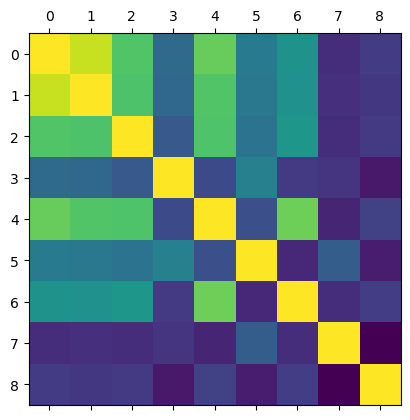

In [39]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_1.corr(numeric_only = True))
plt.show()

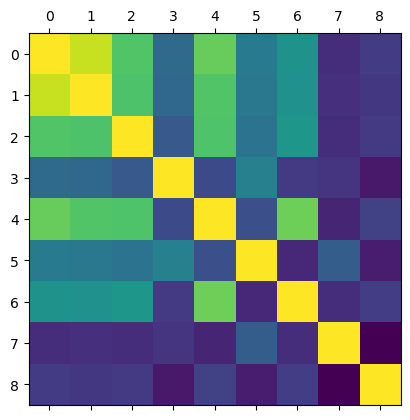

In [40]:
# Save figure
plt.matshow(df_1.corr(numeric_only = True))
plt.savefig("out.png") 

In [41]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\marce\\Documents\\Apartment rental offers in Germany\\03 Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

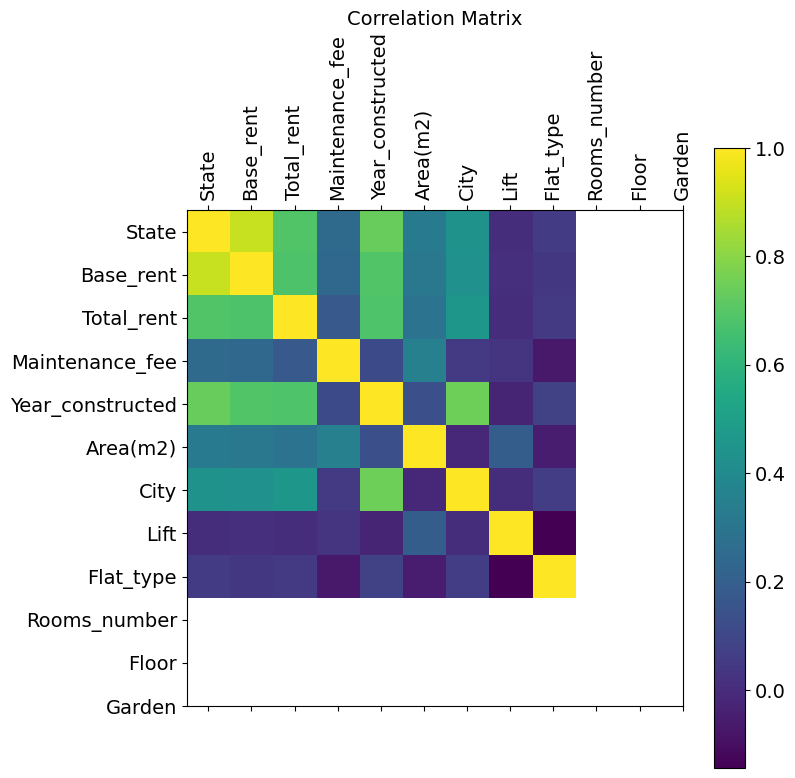

In [42]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_1.corr(numeric_only = True), fignum=f.number) # type of plot
plt.xticks(range(df_1.shape[1]), df_1.columns, fontsize=14, rotation=90) # x axis labels
plt.yticks(range(df_1.shape[1]), df_1.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title


## 3.2 Create correlation heatmap using Seaborn:

In [43]:
df_1.columns

Index(['State', 'Base_rent', 'Total_rent', 'Maintenance_fee',
       'Year_constructed', 'Area(m2)', 'City', 'Lift', 'Flat_type',
       'Rooms_number', 'Floor', 'Garden'],
      dtype='object')

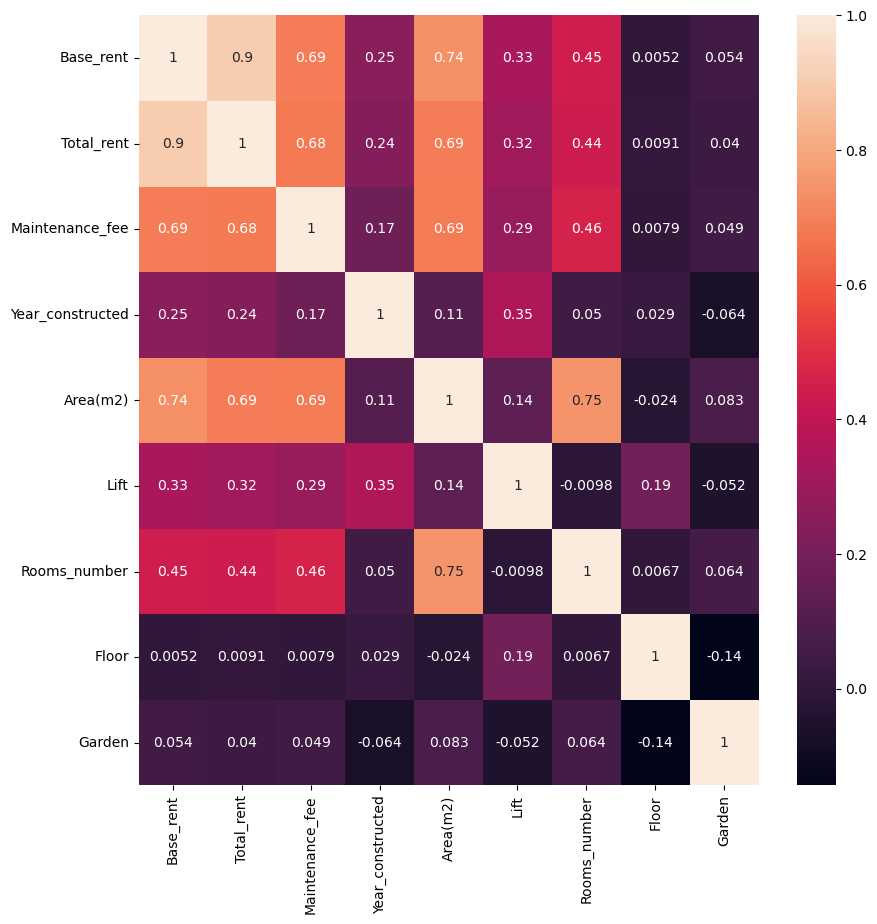

In [44]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_1.corr(numeric_only = True), annot = True, ax = ax)
# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

In [45]:
#From the above heatmap, we deduce that Maintenance_fee and Rooms_number variable are strong correlated with Base_rent and Total_rent. A potive coreelation  between Lift and Year_constructed, which means the higher is the Maintenance fee, the larger is the area  and the Lift availability , the higher the Base rent .



# 4. Scatterplots:

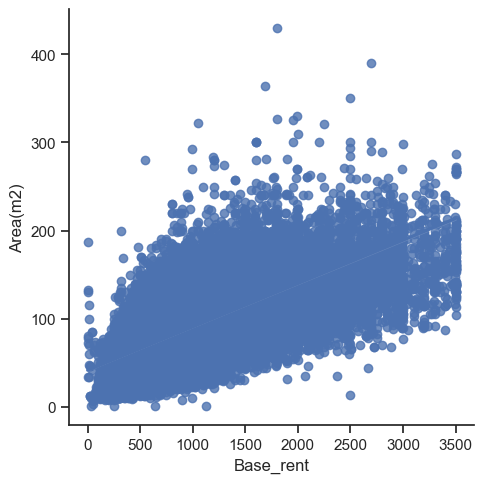

In [63]:
# Create a scatterplot for the "Rent" and "Area(m2)" columns in seaborn

sns.lmplot(x = 'Base_rent', y = 'Area(m2)', data = df_1)

We can observe a strong correlation beetween Area(m2) and Base_rent, as the area increases, so does the Base_rent.

## 4.1. Pair plots:

In [47]:
# Keep only the variables you want to use in the pair plot

df_2 =df_1[['Base_rent','Area(m2)','Rooms_number','Maintenance_fee', 'Year_constructed']]

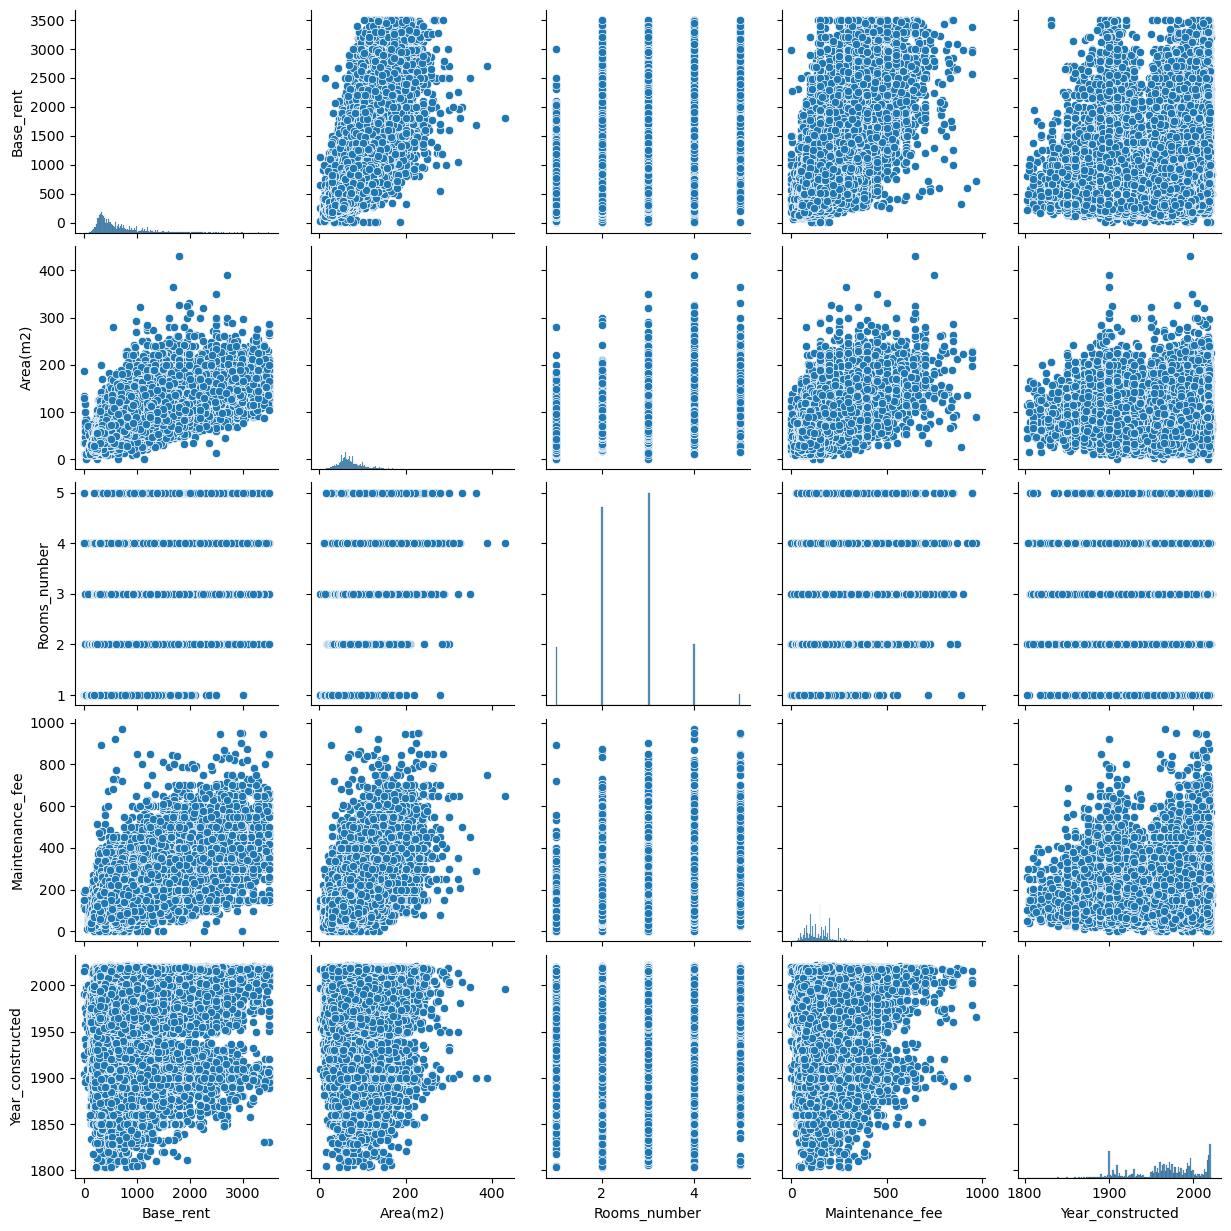

In [48]:
# Create a pair plot 

g = sns.pairplot(df_2) 


We can see a strong correlation between Area (m2) - Base_rent and Year constructed , a positive correlation between Rooms_number and Base_rent, Base_rent and Maintenance_fee, which I would like to explore further

# 5. Categorical Plots:

## 5.1 Creating a categorical variable

In [49]:
# Creating a column with price per square meter

df_price_per_m2=df_1['Base_rent']/df_1['Area(m2)']


In [50]:
# Adding df_price_per_m2 to the dataset
df_1=df_1.assign(Price_per_m2=df_price_per_m2)

<Axes: xlabel='Base_rent', ylabel='Count'>

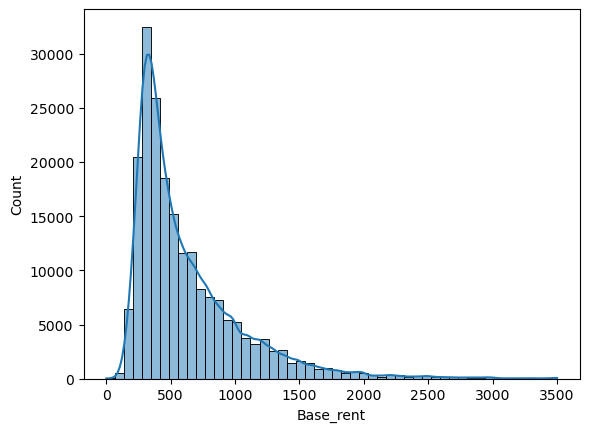

In [51]:
sns.histplot(df_1['Base_rent'], bins = 50, kde = True)

In [52]:
# Creating a subset with only rental value less than 4000 euros and Rooms_number <=5
df_1=df_1.loc[(df_1['Base_rent'] <4000) & (df_2['Rooms_number']<=5)]
               

<Axes: xlabel='Base_rent', ylabel='Count'>

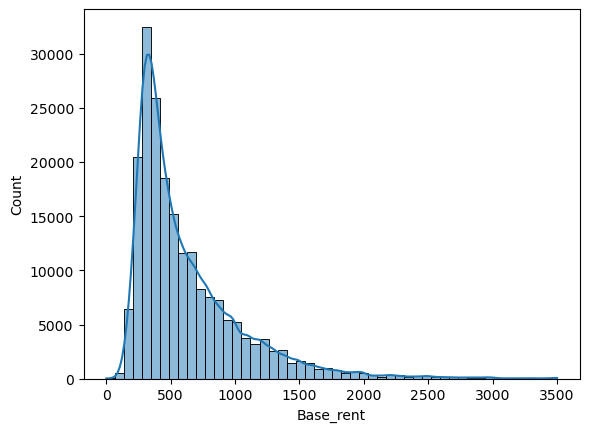

In [53]:
sns.histplot(df_1['Base_rent'], bins = 50, kde = True)

In [54]:
df_1.describe()

,Base_rent,Total_rent,Maintenance_fee,Year_constructed,Area(m2),Rooms_number,Floor,Price_per_m2
count,204611.000000,204611.000000,204611.000000,204611.000000,204611.000000,204611.000000,204611.000000,204611.000000
mean,629.525245,818.613237,150.827096,1967.988207,72.566543,2.574529,2.101710,8.521767
std,433.724243,454.002940,77.644924,38.363419,29.029994,0.901460,1.537416,5.030555
min,1.000000,0.000000,1.000000,1803.000000,1.000000,1.000000,-1.000000,0.005348
25%,334.000000,495.000000,99.000000,1950.000000,54.000000,2.000000,1.000000,5.634146
50%,484.000000,741.000000,140.000000,1973.000000,67.000000,3.000000,2.000000,7.333333
75%,790.000000,919.000000,190.000000,1996.000000,86.000000,3.000000,3.000000,10.081800
max,3500.000000,4460.000000,970.000000,2022.000000,430.000000,5.000000,20.000000,1130.000000


In [55]:
# Creating a new column BaseRent_range
df_1.loc[df_1['Base_rent']<=500, 'Rent_range']='Low Rent'
df_1.loc[(df_1['Base_rent']>=500) & (df_2['Base_rent']<=1000),'Rent_range']='Medium Rent'
df_1.loc[df_1['Base_rent']>=1000, 'Rent_range']='High Rent'


In [56]:
df_1['Rent_range'].value_counts(dropna = False)

Low Rent       106280
Medium Rent     67067
High Rent       31264
Name: Rent_range, dtype: int64

In [57]:
df_1.columns


Index(['State', 'Base_rent', 'Total_rent', 'Maintenance_fee',
       'Year_constructed', 'Area(m2)', 'City', 'Lift', 'Flat_type',
       'Rooms_number', 'Floor', 'Garden', 'Price_per_m2', 'Rent_range'],
      dtype='object')

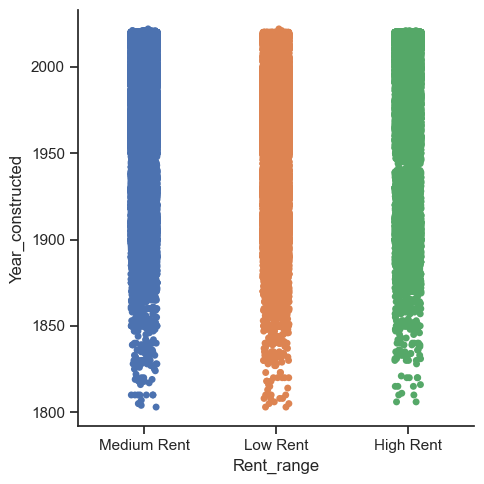

In [61]:
# Create a categorical plot in seaborn using the Rent Range created above

sns.set(style="ticks")
g = sns.catplot(x="Rent_range", y="Year_constructed", hue="Rent_range", data=df_1)



We cannot notice a big difference in rent depending on the year of construction, only a higher concentration of Low Rent and Medium Rent between the years_constructed 1800 and 1850

In [ ]:
# Create a categorical plot in seaborn using the Rent Range created above

sns.set(style="ticks")
g = sns.catplot(x="Rooms_number", y="Year_constructed", hue="Rooms_number", data=df_1)

Houses with 5 rooms start to be more widespread starting with the year 1850

In [ ]:
# Create a categorical plot in seaborn using the Rent Range created above


sns.set(style="ticks")
g = sns.catplot(x="Rent_range", y="Area(m2)", hue="Rent_range", data=df_1)

In [ ]:
#Export the new data:

df_1.to_csv(os.path.join(path,'02 Data','Prepared Data','immodata_cleaned_2.csv'))

# 6. Hypothesis:

## If the area of the rental property is larger, the rental price is higher.

##  If the rental property is newer, the rental price is higher.

## If the rental property has more rooms, the maintenance fee is higher.

# Questions to be explored:

###  - Which are the counties and cities with the most expensive rental price?

### -  Why these cities are more expensive? Are the larger cities with high population density or the more recently built buildings?

### - What factors influence the rental price?